# Dataset Description

This dataset contains survey data on airline passenger satisfaction. It includes information about passenger characteristics (like age, gender, and customer type) and flight details (such as delays, service satisfaction, and comfort). The goal is to predict whether a passenger is satisfied, neutral, or dissatisfied based on these factors.

Key Features:
Personal info: Age, Gender, Customer Type (loyal/disloyal)

Flight details: Type of Travel (business/personal), Class, Flight Distance, Departure/Arrival Delay (in minutes)

Service satisfaction: Wifi service, Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Check-in service, Inflight service, Cleanliness

The dataset helps understand which factors influence passenger satisfaction.

# Features Explanations and Load Dataset

1. **Passenger Characteristics**

These describe the identity or profile of the passenger:
  - `Gender`: Gender of the passengers (Female, Male)

  - `Customer Type`: The customer type (Loyal customer, disloyal customer)

  - `Age`: The actual age of the passengers

  - `Type of Travel`: Purpose of the flight of the passengers (Personal Travel, Business Travel)

  - `Class`: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
---------------
2. **Flight Details**

These describe the flight itself and the experience during the journey:

- `Flight distance`: The flight distance of this journey

- `Departure Delay in Minutes`: Minutes delayed when departure

- `Arrival Delay in Minutes`: Minutes delayed when Arrival

---------------
3. **Service & Experience Ratings**

These are passenger ratings on different aspects of their flight experience(0:Not Applicable;1-5):

- `Inflight wifi service`: Satisfaction level of the inflight wifi service

- `Departure/Arrival time convenient`: Satisfaction level of Departure/Arrival time convenient

- `Ease of Online booking`: Satisfaction level of online booking

- `Gate location`: Satisfaction level of Gate location

- `Food and drink`: Satisfaction level of Food and drink

- `Online boarding`: Satisfaction level of online boarding

- `Seat comfort`: Satisfaction level of Seat comfort

- `Inflight entertainment`: Satisfaction level of inflight entertainment

- `On-board service`: Satisfaction level of On-board service

- `Leg room service`: Satisfaction level of Leg room service

- `Baggage handling`: Satisfaction level of baggage handling

- `Check-in service`: Satisfaction level of Check-in service

- `Inflight service`: Satisfaction level of inflight service

- `Cleanliness`: Satisfaction level of Cleanliness
-------------
3. **Outcome**

This is the target or label indicating the result of the flight experience:

- `Satisfaction`: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Imports libraries for data manipulation, encoding, and visualization: Pandas, NumPy, LabelEncoder, Matplotlib, and Seaborn.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Loads the dataset from the specified path and displays the first few rows of the data using Pandas.

In [ ]:

# Load the datasets
data_path = '/content/drive/MyDrive/airline_passenger_satisfaction_dataset.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the datasets
df.head()

,Unnamed: 0,index,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,21984,Male,disloyal Customer,40,Business travel,Eco,429,4,0,...,1,1,3,4,2,5,1,0,0.0,neutral or dissatisfied
1,1,125971,Male,Loyal Customer,8,Personal Travel,Business,563,2,5,...,1,5,4,5,5,4,1,35,21.0,neutral or dissatisfied
2,2,53341,Male,Loyal Customer,41,Business travel,Business,3390,3,3,...,4,4,4,4,4,4,4,0,0.0,satisfied
3,3,105677,Female,Loyal Customer,27,Business travel,Eco,3050,2,2,...,4,4,1,2,3,2,4,0,4.0,satisfied
4,4,5509,Male,Loyal Customer,49,Business travel,Eco,590,3,5,...,2,2,2,2,5,2,4,46,40.0,satisfied


# Preprocessing


Remove two columns because:

The first column is likely an unnamed or redundant index added during data export.

The 'index' column is just a row identifier that isn't useful for analysis or modeling.

Both don't provide meaningful information for your task.

In [ ]:
df = df.drop(columns=[df.columns[0], 'index'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3247 non-null   object 
 1   Customer Type                      3247 non-null   object 
 2   Age                                3247 non-null   int64  
 3   Type of Travel                     3247 non-null   object 
 4   Class                              3247 non-null   object 
 5   Flight Distance                    3247 non-null   int64  
 6   Inflight wifi service              3247 non-null   int64  
 7   Departure/Arrival time convenient  3247 non-null   int64  
 8   Ease of Online booking             3247 non-null   int64  
 9   Gate location                      3247 non-null   int64  
 10  Food and drink                     3155 non-null   float64
 11  Online boarding                    3247 non-null   int64

**Handling missing values**

As per instructions, features with more than 30% missing values should be discarded, and rows with less than 30% missing values should have their corresponding missing data removed.

Upon checking, no feature had more than 30% missing values. Therefore, instead of discarding columns, I removed the rows that had missing values. A total of 102 rows were removed, ensuring the dataset only contains complete data.

In [ ]:
# Check for missing values
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0])

before = df.shape[0]
df = df.dropna()
after = df.shape[0]
print(f"Rows removed: {before - after}")

Food and drink              2.833385
Arrival Delay in Minutes    0.307977
dtype: float64
Rows removed: 102


**Handling categorical features**

Find the categorical features in dataset

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('satisfaction')  # Exclude target column
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

Exploratory Analysis of Categorical Features and Their Relationship with Passenger Satisfaction

Gender: Satisfaction levels are quite similar between males and females, so gender may not be a strong predictor of satisfaction.

Customer Type: Loyal customers are more likely to be satisfied, making this feature informative.

Type of Travel: Business travelers are much more satisfied than personal travelers, indicating strong predictive value.

Class: Passengers in Business class report higher satisfaction than those in Eco or Eco Plus, making this a useful feature.

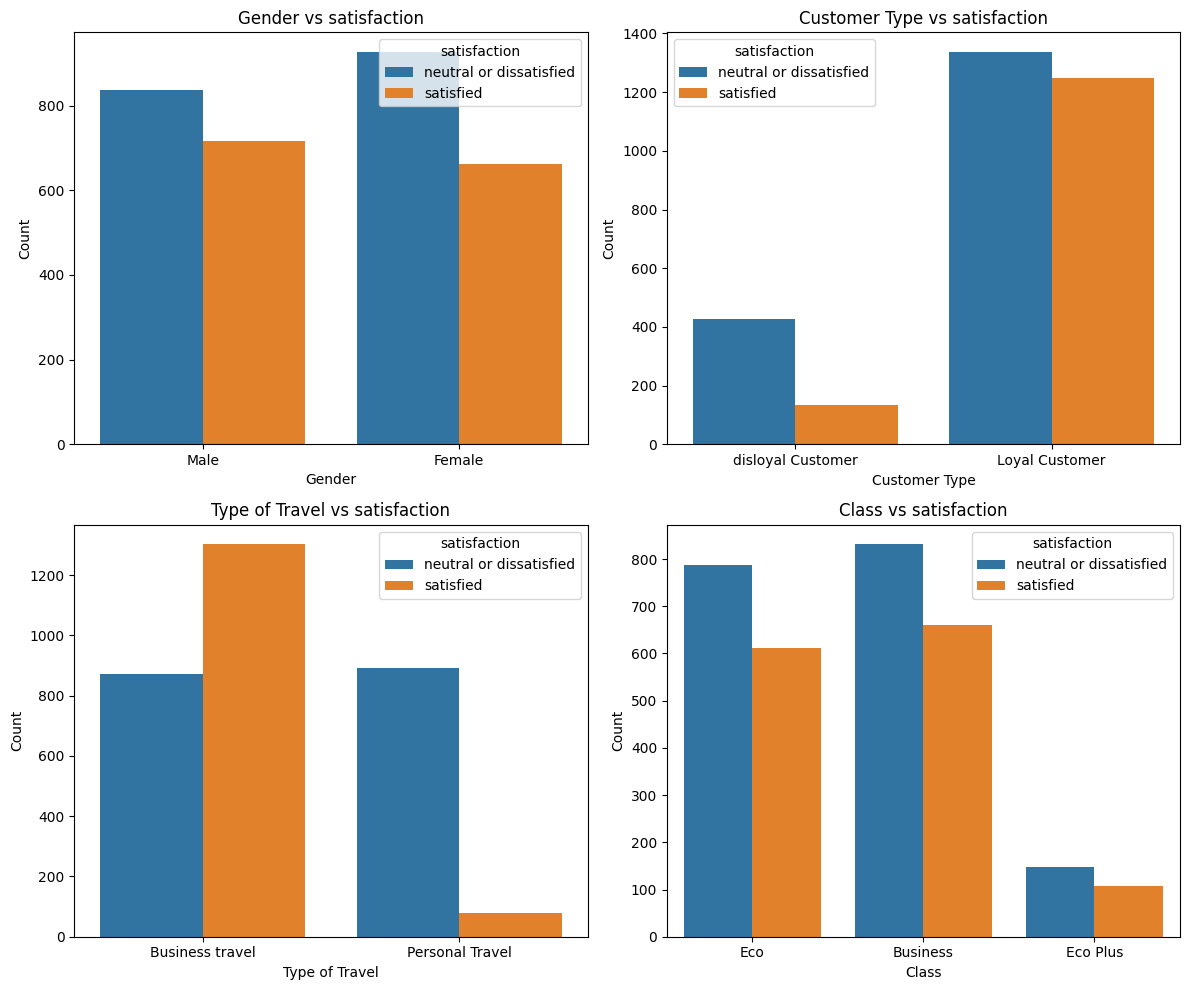

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='satisfaction', ax=axes[i])
    axes[i].set_title(f'{col} vs satisfaction')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='satisfaction')

plt.tight_layout()
plt.show()


**Data Encoding**

To make categorical features usable for machine learning models, appropriate encoding methods were applied based on the nature of each variable:

Label Encoding was used for binary features (Gender, Customer Type, Type of Travel, satisfaction) because these variables have only two categories and no meaningful order, making label encoding a simple and effective choice.

Ordinal Encoding was used for the Class feature since the travel classes (Eco, Eco Plus, Business) have a clear order in terms of service level. Assigning increasing integers preserves this hierarchy for models that might benefit from the ordinal relationship.

This encoding approach ensures the model can process categorical information correctly while preserving relevant relationships between categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Label Encode binary categorical features
df['Gender'] = le.fit_transform(df['Gender'])               # Female = 0, Male = 1
df['Customer Type'] = le.fit_transform(df['Customer Type']) # disloyal = 0, loyal = 1
df['Type of Travel'] = le.fit_transform(df['Type of Travel']) # Personal = 0, Business = 1
df['satisfaction'] = le.fit_transform(df['satisfaction']) # neutral or dissatisfied = 0, satisfied = 1

# Ordinal Encode 'Class' feature manually
class_mapping = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
df['Class'] = df['Class'].map(class_mapping)

df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,40,0,0,429,4,0,2,4,...,1,1,3,4,2,5,1,0,0.0,0
2,1,0,41,0,2,3390,3,3,2,3,...,4,4,4,4,4,4,4,0,0.0,1
3,0,0,27,0,0,3050,2,2,2,2,...,4,4,1,2,3,2,4,0,4.0,1
4,1,0,49,0,0,590,3,5,2,5,...,2,2,2,2,5,2,4,46,40.0,1
5,0,0,39,0,0,2839,1,0,0,1,...,2,2,2,2,3,2,4,0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242,1,0,44,0,1,771,5,2,2,2,...,3,2,4,3,5,2,3,74,84.0,1
3243,0,0,23,0,1,3917,4,3,3,3,...,5,5,1,4,2,1,5,0,0.0,1
3244,1,0,25,0,2,607,2,2,2,2,...,2,3,2,4,2,3,2,13,16.0,0
3245,1,1,23,0,1,1470,4,0,0,4,...,4,5,3,4,4,4,4,0,2.0,1


Numerical Feature Distribution

Histograms were plotted to understand the distribution of numerical variables in the dataset. This helps identify skewness, outliers, and patterns such as normal or uniform distribution, which are useful for deciding if scaling, transformation, or outlier handling is needed.









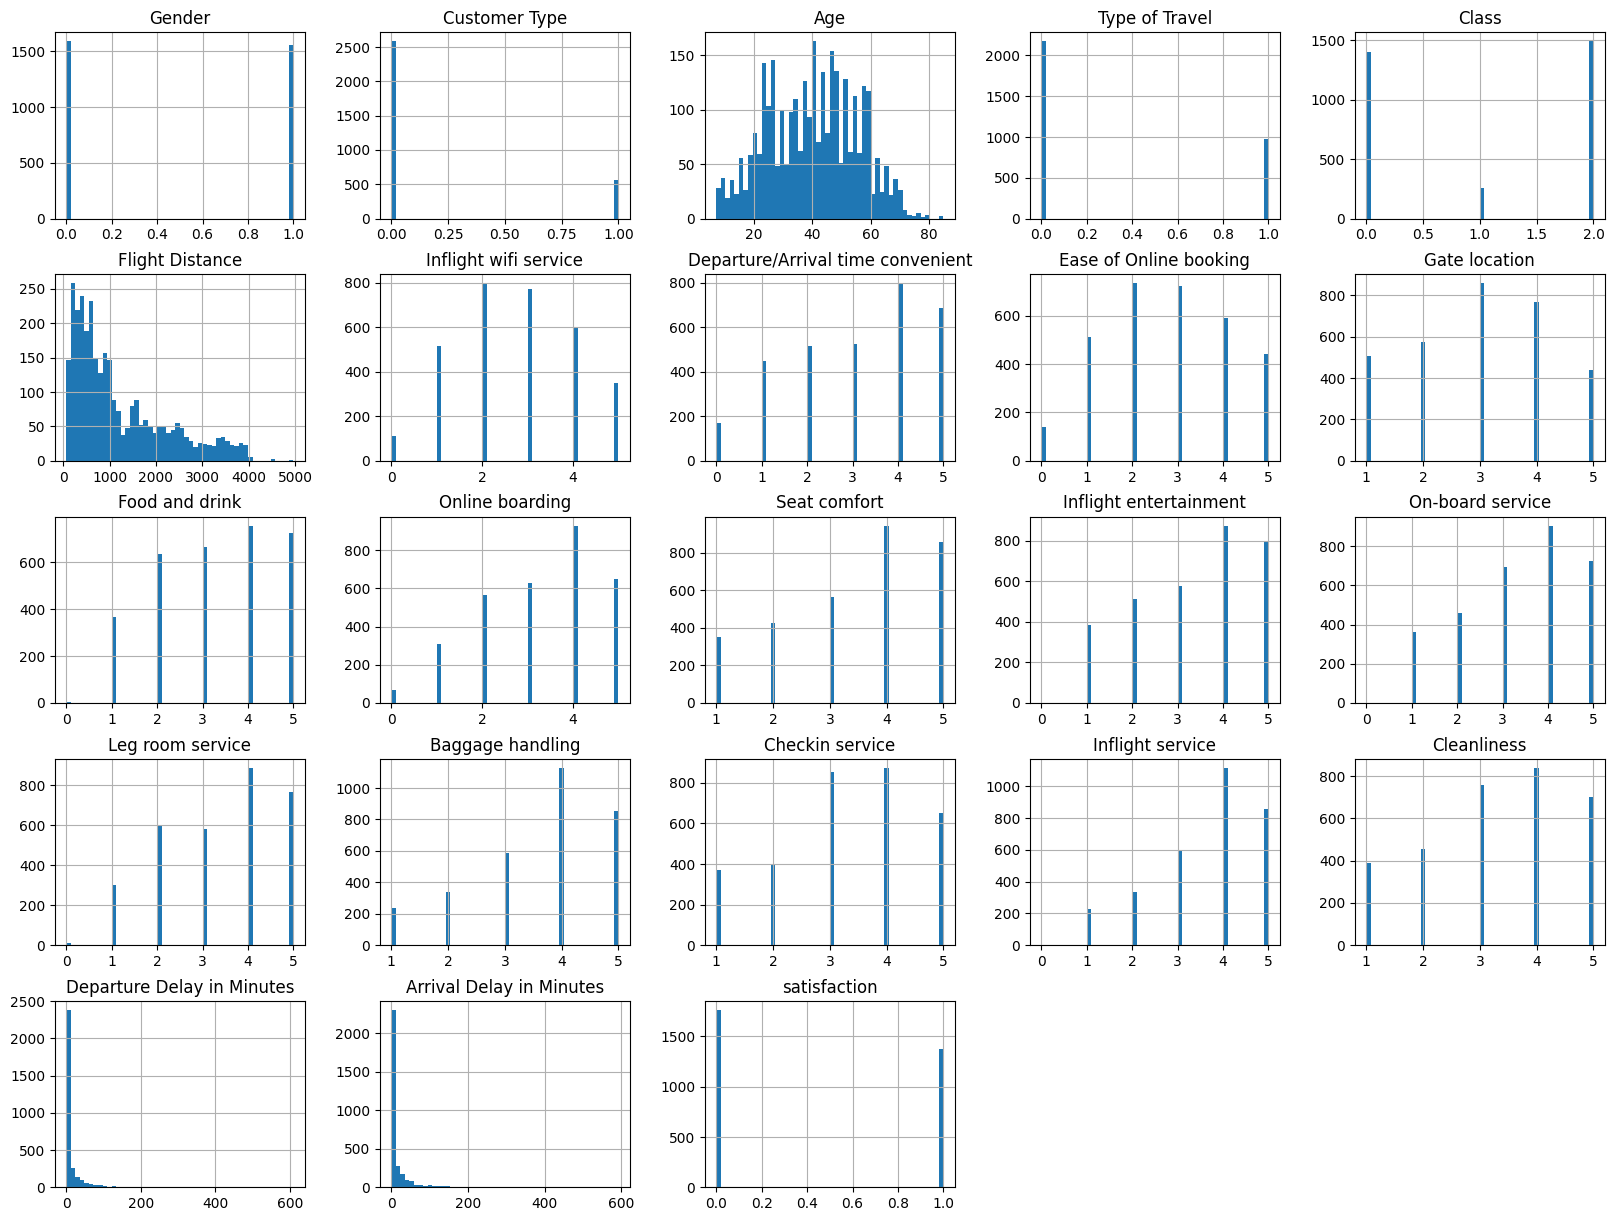

In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

Correlation Analysis

A correlation matrix was computed to identify relationships between numerical features. Only correlations with an absolute value above 0.3 were visualized to focus on meaningful associations. A heatmap was used to highlight these correlations, excluding perfect self-correlations, to better understand feature dependencies for modeling.



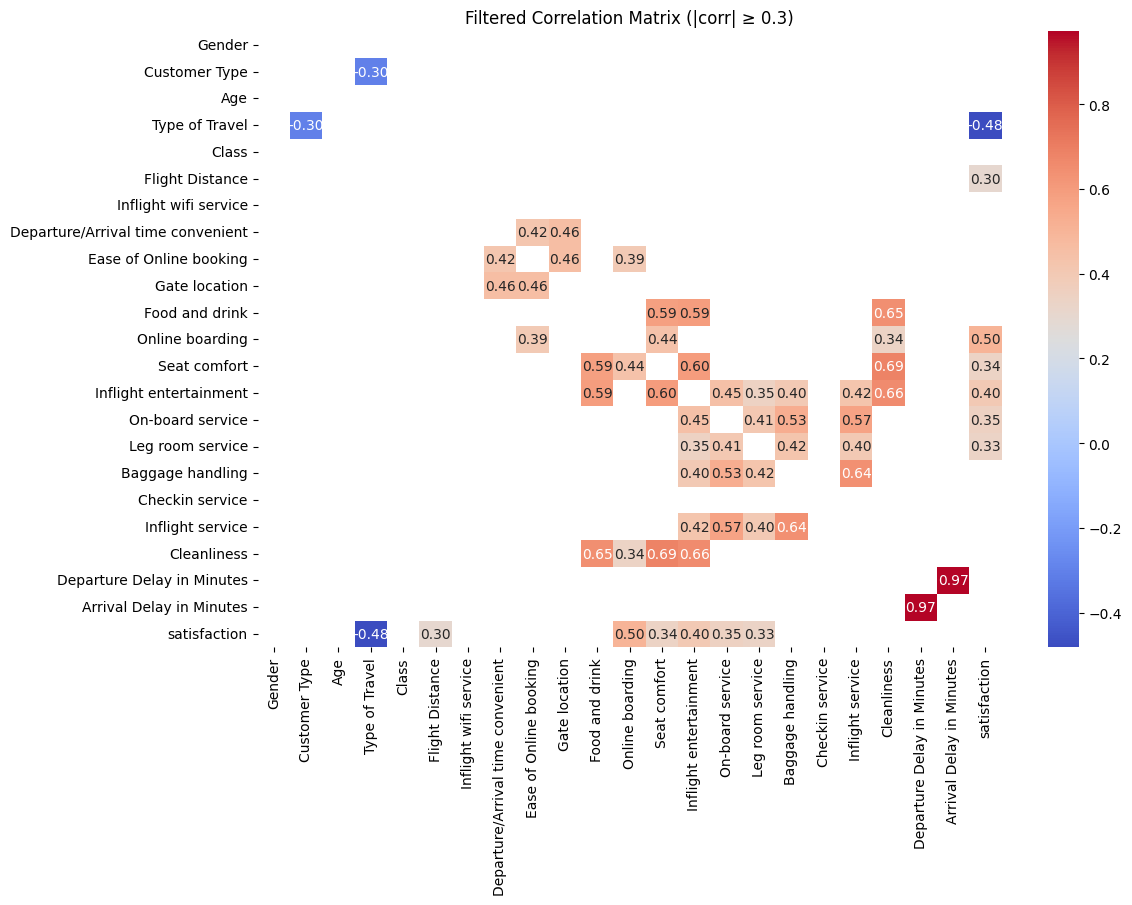

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set a threshold
threshold = 0.3

# Filter to show only correlations above the threshold or below -threshold
filtered_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Mask self-correlations (1.0 on the diagonal)
mask = (filtered_corr == 1.0)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, cbar=True)
plt.title("Filtered Correlation Matrix (|corr| ≥ 0.3)")
plt.show()


We found that Departure Delay in Minutes and Arrival Delay in Minutes are highly correlated (correlation coefficient ≈ 0.97), indicating redundancy. To reduce multicollinearity and simplify the model without losing predictive power, we dropped Departure Delay in Minutes and kept Arrival Delay, which is more directly related to customer satisfaction.

In [ ]:
# Drop Departure Delay due to high correlation with Arrival Delay
df = df.drop(columns=['Departure Delay in Minutes'])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,1,1,40,0,0,429,4,0,2,4,...,1,1,1,3,4,2,5,1,0.0,0
2,1,0,41,0,2,3390,3,3,2,3,...,5,4,4,4,4,4,4,4,0.0,1
3,0,0,27,0,0,3050,2,2,2,2,...,4,4,4,1,2,3,2,4,4.0,1
4,1,0,49,0,0,590,3,5,2,5,...,5,2,2,2,2,5,2,4,40.0,1
5,0,0,39,0,0,2839,1,0,0,1,...,4,2,2,2,2,3,2,4,7.0,1


# Modeling Classification algorithms



The data is split into training (80%) and testing (20%) sets, with class balance preserved using stratify=y. This prepares the data for model training and evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
341,0,0,60,0,2,466,2,1,1,1,...,1,2,5,5,5,5,5,5,5,0.0
1870,1,0,58,0,0,3596,2,3,3,3,...,4,5,5,5,5,5,5,5,4,0.0
28,1,0,66,0,0,224,3,1,1,1,...,1,1,1,1,3,4,4,3,1,0.0
514,1,0,8,1,2,197,4,5,1,5,...,1,5,5,5,1,2,1,1,5,0.0
2858,0,0,59,0,2,1546,3,3,3,3,...,3,3,4,4,4,4,1,4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0,0,42,1,2,814,2,1,2,3,...,3,4,2,2,2,4,2,2,2,0.0
1620,0,1,39,0,2,211,3,0,5,3,...,5,4,4,3,5,4,3,5,4,0.0
799,0,0,50,0,2,2770,1,4,1,1,...,5,4,4,4,4,4,4,4,4,42.0
161,1,0,40,0,2,250,4,3,5,3,...,5,5,4,4,4,4,4,4,3,25.0


## **Logistic Regression**

Logistic regression is a statistical classification algorithm used to predict the probability of a binary outcome (e.g., satisfied vs. dissatisfied) based on input features. It works by computing a weighted sum of the input variables and applying the sigmoid function to map the result to a probability between 0 and 1. If the predicted probability is above a certain threshold (commonly 0.5), the model classifies the input as belonging to one class; otherwise, it assigns it to the other. Logistic regression is trained using a loss function called binary cross-entropy (or log loss), which measures how well the predicted probabilities match the actual labels. It’s widely used in applications like medical diagnosis, customer churn prediction, and sentiment analysis.


In this code, I implement a logistic regression model using scikit-learn to classify data. I decided to use logistic regression as the baseline model. The code begins by training the model on the training dataset (`X_train`, `y_train`). After the model is trained, it evaluates its performance on the test dataset (`X_test`, `y_test`). The evaluation includes calculating the accuracy, generating a classification report (which includes precision, recall, and F1-score), and displaying the confusion matrix. Additionally, the model predicts the probabilities of the positive class and computes the AUC-ROC score to assess its ability to discriminate between the positive and negative classes.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

# Initialize model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


y_probs = model.predict_proba(X_test)[:, 1]

# Compute AUC-ROC
auc_LogisticRegression = roc_auc_score(y_test, y_probs)
print("AUC-ROC Score:", auc_LogisticRegression)


Accuracy: 0.8600953895071543
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       353
           1       0.86      0.82      0.84       276

    accuracy                           0.86       629
   macro avg       0.86      0.86      0.86       629
weighted avg       0.86      0.86      0.86       629

Confusion Matrix:
 [[315  38]
 [ 50 226]]
AUC-ROC Score: 0.923256148129901


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **RandomForestClassifier**



RandomForestClassifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes (classification) or average prediction (regression) of the individual trees.

Ensemble Learning: Combines multiple decision trees to improve generalizability and robustness over a single tree.
Decision Trees: Each tree in the forest is trained on a random subset of the data and features, enhancing diversity and reducing overfitting.
Hyperparameters:



*   n_estimators: Number of trees in the forest.
*   max_depth: Maximum depth of each tree to control overfitting.
*   min_samples_split: Minimum number of samples required to split an internal node.
*   min_samples_leaf: Minimum number of samples required to be at a leaf node.

**RandomizedSearchCV**

RandomizedSearchCV is a technique used to tune hyperparameters by sampling a specified number of combinations from a parameter grid, instead of exhaustively searching through all possible combinations (as in GridSearchCV).


In this code, I perform hyperparameter tuning for a Random Forest classifier using `RandomizedSearchCV` from scikit-learn. I define a set of possible values for key hyperparameters such as the number of trees (`n_estimators`), tree depth (`max_depth`), and minimum samples required to split or be a leaf. The randomized search evaluates 100 random combinations of these parameters using 3-fold cross-validation to identify the best configuration. This helps improve the model's performance and prevent overfitting by selecting optimal hyperparameters efficiently


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search CV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", rf_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


After identifying the best hyperparameters using `RandomizedSearchCV`, this code retrieves the best-performing Random Forest model (`best_estimator_`) and fits it on the training data. This ensures the model is trained using the optimal configuration found during the hyperparameter search.


In [ ]:
# Train the model using the best parameters
best_rf = rf_random.best_estimator_

best_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, random_state=42)

The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) score is a metric used to assess the performance of a machine learning model in classification tasks. It summarizes how well the model distinguishes between different classes by plotting the True Positive Rate (correct predictions of the positive class) against the False Positive Rate (incorrect predictions of the positive class). A higher AUC score, which ranges from 0 to 1, indicates better performance, with 1 indicating perfect classification and 0.5 indicating no better than chance. It's valuable because it provides a single number that quantifies the model's ability to rank predictions and is widely used for comparing and selecting the best models for classification problems.

This code evaluates the performance of the best Random Forest model on the test data. It first predicts class labels and class probabilities. Then, it prints a classification report (precision, recall, F1-score) and computes the AUC-ROC score to measure how well the model distinguishes between classes. Finally, it plots the ROC curve, which visualizes the trade-off between the true positive rate and false positive rate at different threshold settings.



              precision    recall  f1-score   support

           0       0.89      0.95      0.92       353
           1       0.93      0.84      0.89       276

    accuracy                           0.90       629
   macro avg       0.91      0.90      0.90       629
weighted avg       0.91      0.90      0.90       629

AUC-ROC Score:  0.9694287063267234


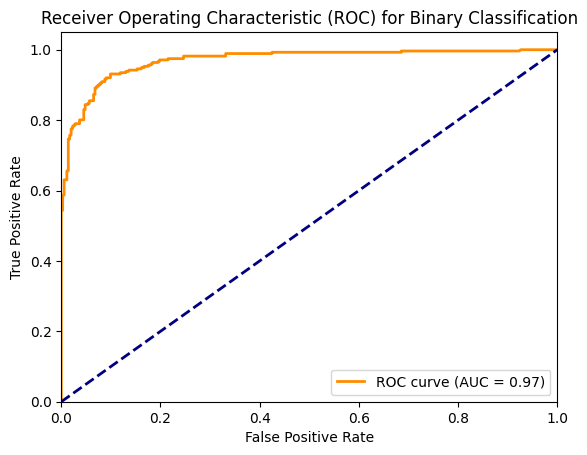

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Predict on test set
y_pred = best_rf.predict(X_test)
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# AUC-ROC Score
auc_RandomForest = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC Score: ", auc_RandomForest)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_RandomForest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Binary Classification')
plt.legend(loc="lower right")
plt.show()


## LightGBM classifier

LightGBM is a gradient boosting framework that is designed for efficiency and performance in handling large datasets and high-dimensional features.
- **LightGBM**: It stands for Light Gradient Boosting Machine. It's a fast, distributed, high-performance gradient boosting framework developed by Microsoft.
- **Key Features**: LightGBM uses a novel technique called Gradient-based One-Side Sampling (GOSS) to filter out the data instances for finding a split value while Tree-based Feature Histogram (EFB) is used to reduce the computation complexity. It also supports GPU learning and is compatible with both Python and R.

Parameters for Fine-Tuning:

When fine-tuning a LightGBM model using `RandomizedSearchCV`, the following parameters are explored to optimize the model's performance:

- **n_estimators**: The number of boosting rounds or trees to build.
- **max_depth**: Maximum depth of each tree.
- **learning_rate**: Rate at which the model learns patterns from data.
- **subsample**: Fraction of samples used for training each tree.
- **colsample_bytree**: Fraction of features used for training each tree.
- **min_child_samples**: Minimum number of samples required to be at a leaf node.
- **reg_alpha** and **reg_lambda**: Regularization parameters to prevent overfitting.
- **num_leaves**: Maximum number of leaves in each tree.

These parameters collectively influence how the LightGBM model learns from the data and makes predictions. Fine-tuning involves searching for the combination of these parameters that results in the best model performance, as measured by metrics like accuracy, AUC-ROC score, or other relevant metrics for your specific classification task. Adjusting these parameters optimizes the model's ability to generalize well to unseen data and improve its predictive power.

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the LightGBM model
lgb_model = lgb.LGBMClassifier()

# Parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': sp_randint(50, 200),
    'max_depth': sp_randint(3, 15),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_samples': sp_randint(5, 50),
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'num_leaves': sp_randint(20, 50)
}

# Randomized Search CV
lgb_random = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid, n_iter=30,
                                cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
lgb_random.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", lgb_random.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1104, number of negative: 1412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 2516, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438792 -> initscore=-0.246067
[LightGBM] [Info] Start training from score -0.246067
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 11, 'min_child_samples': 7, 'n_estimators': 100, 'num_leaves': 26, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.7}


After identifying the best hyperparameters through `RandomizedSearchCV`, this code initializes and trains a new LightGBM model (`best_lgb_model`) using those optimal settings. It then makes predictions on the test dataset, preparing for evaluation of the model's performance.


In [ ]:
# Initialize LightGBM with best parameters
best_lgb_model = lgb.LGBMClassifier(**lgb_random.best_params_)

# Fit the model with best parameters
best_lgb_model.fit(X_train, y_train)

# Predictions
y_pred = best_lgb_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1104, number of negative: 1412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 2516, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438792 -> initscore=-0.246067
[LightGBM] [Info] Start training from score -0.246067


This code evaluates the performance of the tuned LightGBM model. It generates class predictions and predicted probabilities on the test set. Then, it prints the classification report (precision, recall, F1-score) and calculates the AUC-ROC score. Finally, it plots the ROC curve to visualize the model’s ability to distinguish between classes at various threshold levels.


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       353
           1       0.93      0.87      0.90       276

    accuracy                           0.92       629
   macro avg       0.92      0.91      0.92       629
weighted avg       0.92      0.92      0.92       629

AUC-ROC Score:  0.9739602578314243


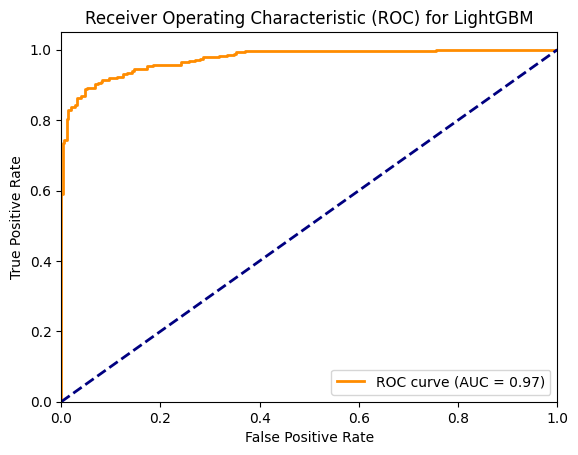

In [ ]:
# Predict on test set
y_pred = best_lgb_model.predict(X_test)
y_pred_prob = best_lgb_model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# AUC-ROC Score
auc_LGBMClassifier = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC Score: ", auc_LGBMClassifier)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_LGBMClassifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LightGBM')
plt.legend(loc="lower right")
plt.show()


## Models Comparison

This code visualizes the AUC-ROC scores of three classification models—Logistic Regression (used as the baseline), Random Forest, and LightGBM—by plotting them in a bar chart. The AUC scores are scaled from 0–1 to percentages (0–100) and labeled with two decimal precision above each bar for clarity. This visual comparison helps highlight the relative performance of each model in terms of classification quality.


<ipython-input-31-73cdf6681321>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=auc_scores_percent, palette='viridis')


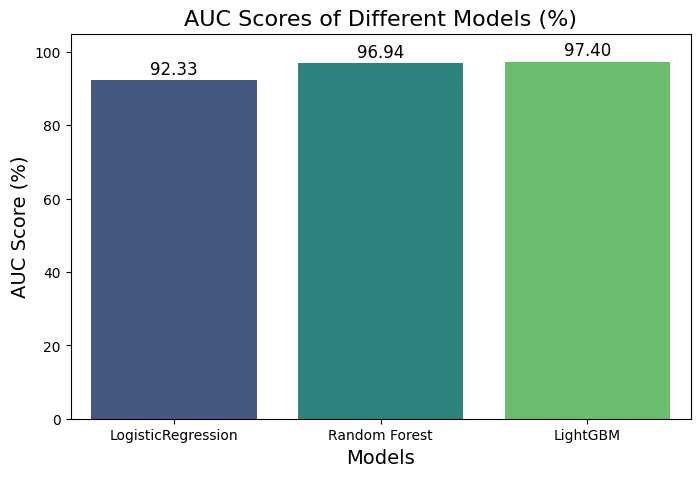

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# AUC scores of three models
model_names = ['LogisticRegression', 'Random Forest', 'LightGBM']
auc_scores = [auc_LogisticRegression, auc_RandomForest, auc_LGBMClassifier]

# Scale to 0–100 for percentage display
auc_scores_percent = [score * 100 for score in auc_scores]

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=model_names, y=auc_scores_percent, palette='viridis')

# Add value labels on top of each bar
for i, score in enumerate(auc_scores_percent):
    ax.text(i, score + 0.5, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('AUC Scores of Different Models (%)', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('AUC Score (%)', fontsize=14)

# Display the plot
plt.ylim(0, 105)
plt.show()



The AUC-ROC scores indicate how well each model distinguishes between the two classes:

* **Logistic Regression** (92.33%): As a baseline model, it performs reasonably well, correctly ranking positive instances ahead of negative ones about 92% of the time.
* **Random Forest** (96.94%): Shows a significant improvement over Logistic Regression, suggesting that it captures more complex patterns in the data due to its ensemble nature.
* **LightGBM** (97.40%): Slightly outperforms Random Forest, making it the best model among the three. Its gradient boosting framework is highly effective in handling non-linear relationships and feature interactions.

**Interpretation**: While all models perform well, the improvement from Logistic Regression to LightGBM reflects the added benefit of using more advanced ensemble methods. LightGBM offers the highest discriminatory power, making it the preferred choice for this binary classification task.


# Explainability Issue

SHAP (SHapley Additive exPlanations) is a method used to explain the output of machine learning models by quantifying the contribution of each feature to the model's predictions. It draws from game theory, specifically Shapley values, which determine how to fairly distribute payouts among players in a cooperative game.

Shapley Values: SHAP computes Shapley values, which attribute the contribution of each feature by considering all possible permutations of features. It calculates how each feature affects the model's predictions in combination with other features.

This section uses SHAP to interpret the LightGBM model.
SHAP explains the contribution of each feature to the predictions.
We initialize a SHAP explainer for the trained LightGBM model and compute SHAP values for the training data.


In [ ]:
!pip install shap
import shap
import numpy as np
import pandas as pd


# Initialize the SHAP explainer
explainer = shap.Explainer(best_lgb_model, X_train)
shap_values = explainer(X_train)

 94%|=================== | 2373/2516 [00:13<00:00]       

The SHAP beeswarm plot shows feature importance and their impact on predictions. Each point represents a feature's contribution, with color indicating feature value and position showing the effect on the model's output.

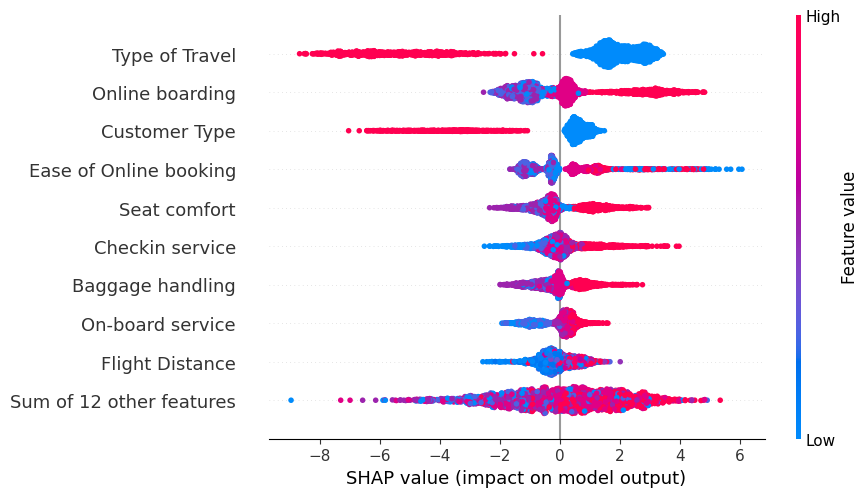

In [ ]:
shap.plots.beeswarm(shap_values)

The SHAP bar plot displays the average absolute SHAP value for each feature, providing a summary of feature importance. Features are ranked by their overall impact on the model, with the length of the bars representing the magnitude of their contribution to the predictions.

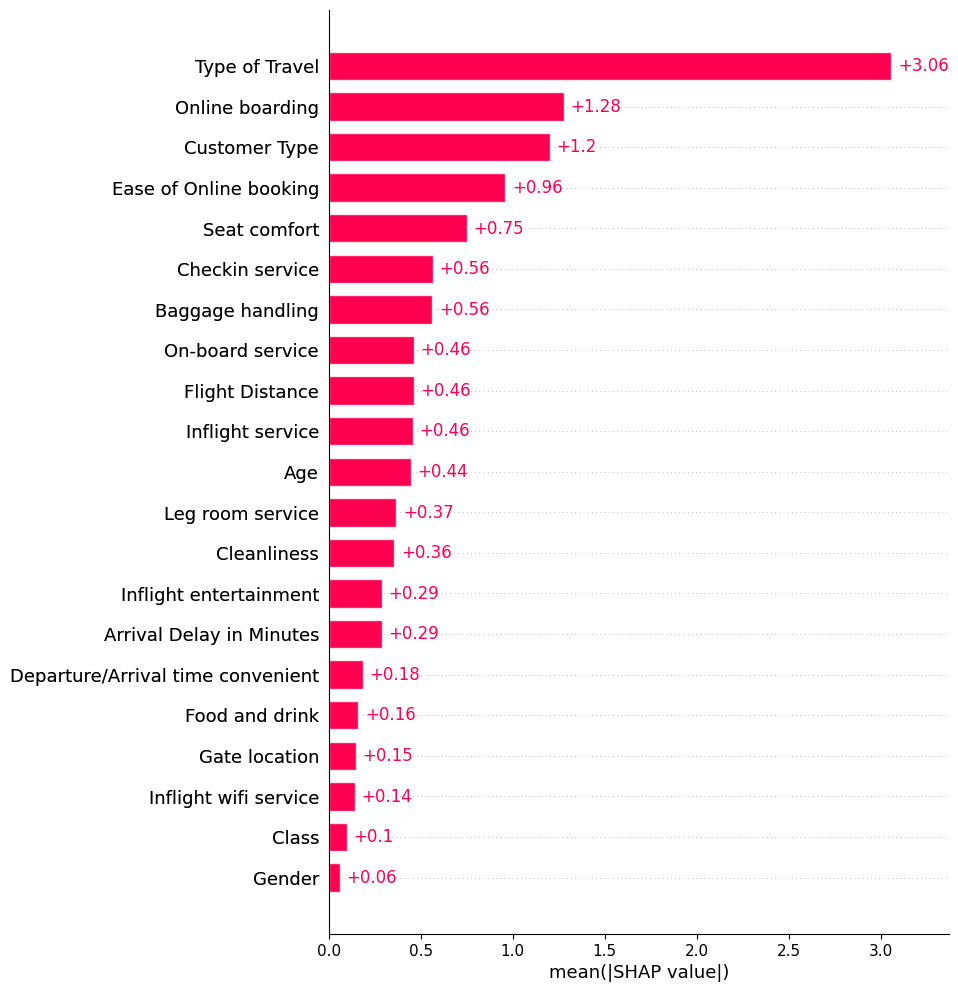

In [ ]:
shap.plots.bar(shap_values, max_display=X_train.shape[1])

Most Important Features:

1. **Type of Travel (3.06)**: The purpose of the flight (personal vs. business) strongly influences satisfaction, with business travelers likely having different priorities than leisure travelers.
2. **Online Boarding (1.28)**: A smooth online boarding process significantly affects satisfaction, highlighting the importance of ease and convenience in the customer experience.
3. **Customer Type (1.20)**: Loyal customers tend to have higher satisfaction, emphasizing the value of customer retention.
4. **Ease of Online Booking (0.96)**: A simple and user-friendly online booking process increases satisfaction, making it a key aspect of the travel experience.
5. **Seat Comfort (0.75)**: Comfortable seating is essential for passenger satisfaction, especially on longer flights.

Lowest Influence Features:

1. **Gender (0.06)**: Gender has minimal impact on satisfaction, suggesting that service quality is more important than demographic factors.
2. **Class (0.10)**: Travel class (business, economy, economy plus) has a low influence on satisfaction, indicating that service quality matters more than the class of travel.
3. **Inflight Wifi Service (0.14)**: Although important to some, inflight wifi quality has a low impact on overall satisfaction.
4. **Departure/Arrival Time Convenient (0.18)**: Timely departures and arrivals have a minor effect, with other factors like service quality being more significant.
5. **Gate Location (0.15)**: The location of the gate is less influential, suggesting that passengers prioritize in-flight experiences over gate convenience.

Summary:

Passenger satisfaction is mainly driven by **service quality**, **ease of booking**, and **loyalty**. Demographic and operational factors like **gender**, **class**, and **gate location** have minimal impact.
